## Import

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


## Exploring data

### Read cleaned data from file

In [2]:
# Read data from CSV file
movie_df = pd.read_csv('../data/processed/data.csv', index_col=0)
movie_df.reset_index(drop=True, inplace=True)
# Display the first 5 lines of data
movie_df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,year_added,month_added
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,9
1,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",2021,9
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021,9
3,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV",2021,9
4,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",2021,9


### Data overview

**We want to know what is Netflix's main content, is it movies or tv show ?**

First, we need to count the number of each type of content in the dataset and save it to a a dataframe `mf_ratio`

In [3]:
x= movie_df['type'].value_counts()
y= len(movie_df)
r=((x/y)).round(2)

mf_ratio = pd.DataFrame(r).T

We then can use the `mf_ratio` dataframe to plot the distribution of movie and tv show on Netflix using a pie chart.

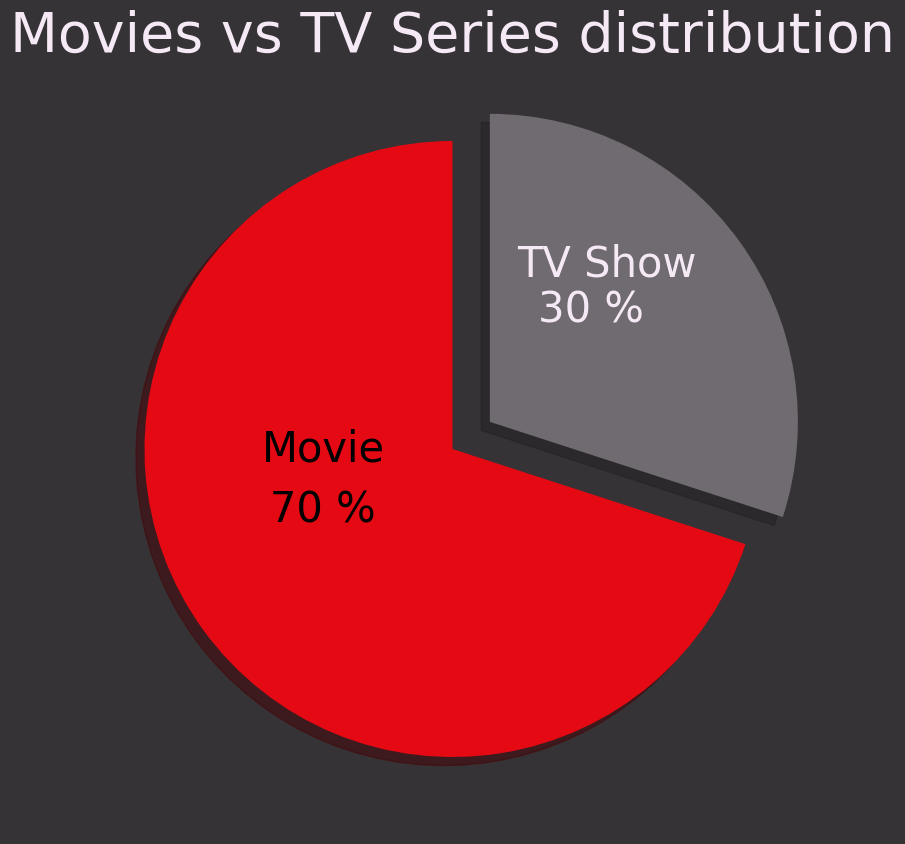

In [4]:
values = mf_ratio.values.flatten().tolist()
labels = mf_ratio.columns.tolist()
explode = (0, 0.15)
colors = ['#E50914', '#221f1f']  # Netflix red and dark color for the slices
fig, ax = plt.subplots(figsize=(25, 10), facecolor="#363336")
plt.pie(x=values, shadow=True, explode=explode, colors =['#E50914','#706B70'], startangle=90)
plt.title('Movies vs TV Series distribution', color='#F5E9F5', fontsize=40)
ax.text(s=labels[0],x=-0.42,y=0,fontsize=30,va='center',ha='center')
ax.text(s=f'{values[0] * 100:.0f} %',x=-0.42,y=-0.2,fontsize=30,va='center',ha='center')

ax.text(s=labels[1],x=0.5,y=0.6, fontsize=30,color='#F5E9F5',va='center',ha='center')
ax.text(s=f'{values[1] * 100:.0f} %',x=0.45,y=0.45,fontsize=30,va='center',ha='center', color='#F5E9F5')
# Display the pie chart
plt.show()

2/3 of the content on Netflix is movies, while the rest is tv show.

**How many tv shows/ movies are added to Netflix each year from 2008 to 2021 ?**

First, we have to create 2 dataframes, one for movies and one for tv shows. We then count the number of movies/tv shows added each year and save it to a new dataframe `movie_count` and `tv_series_count`.

In [5]:
movies = movie_df[movie_df['type'] == 'Movie']
tv_series = movie_df[movie_df['type'] == 'TV Show']

movies_count = movies['year_added'].value_counts().sort_index()
tv_series_count = tv_series['year_added'].value_counts().sort_index()

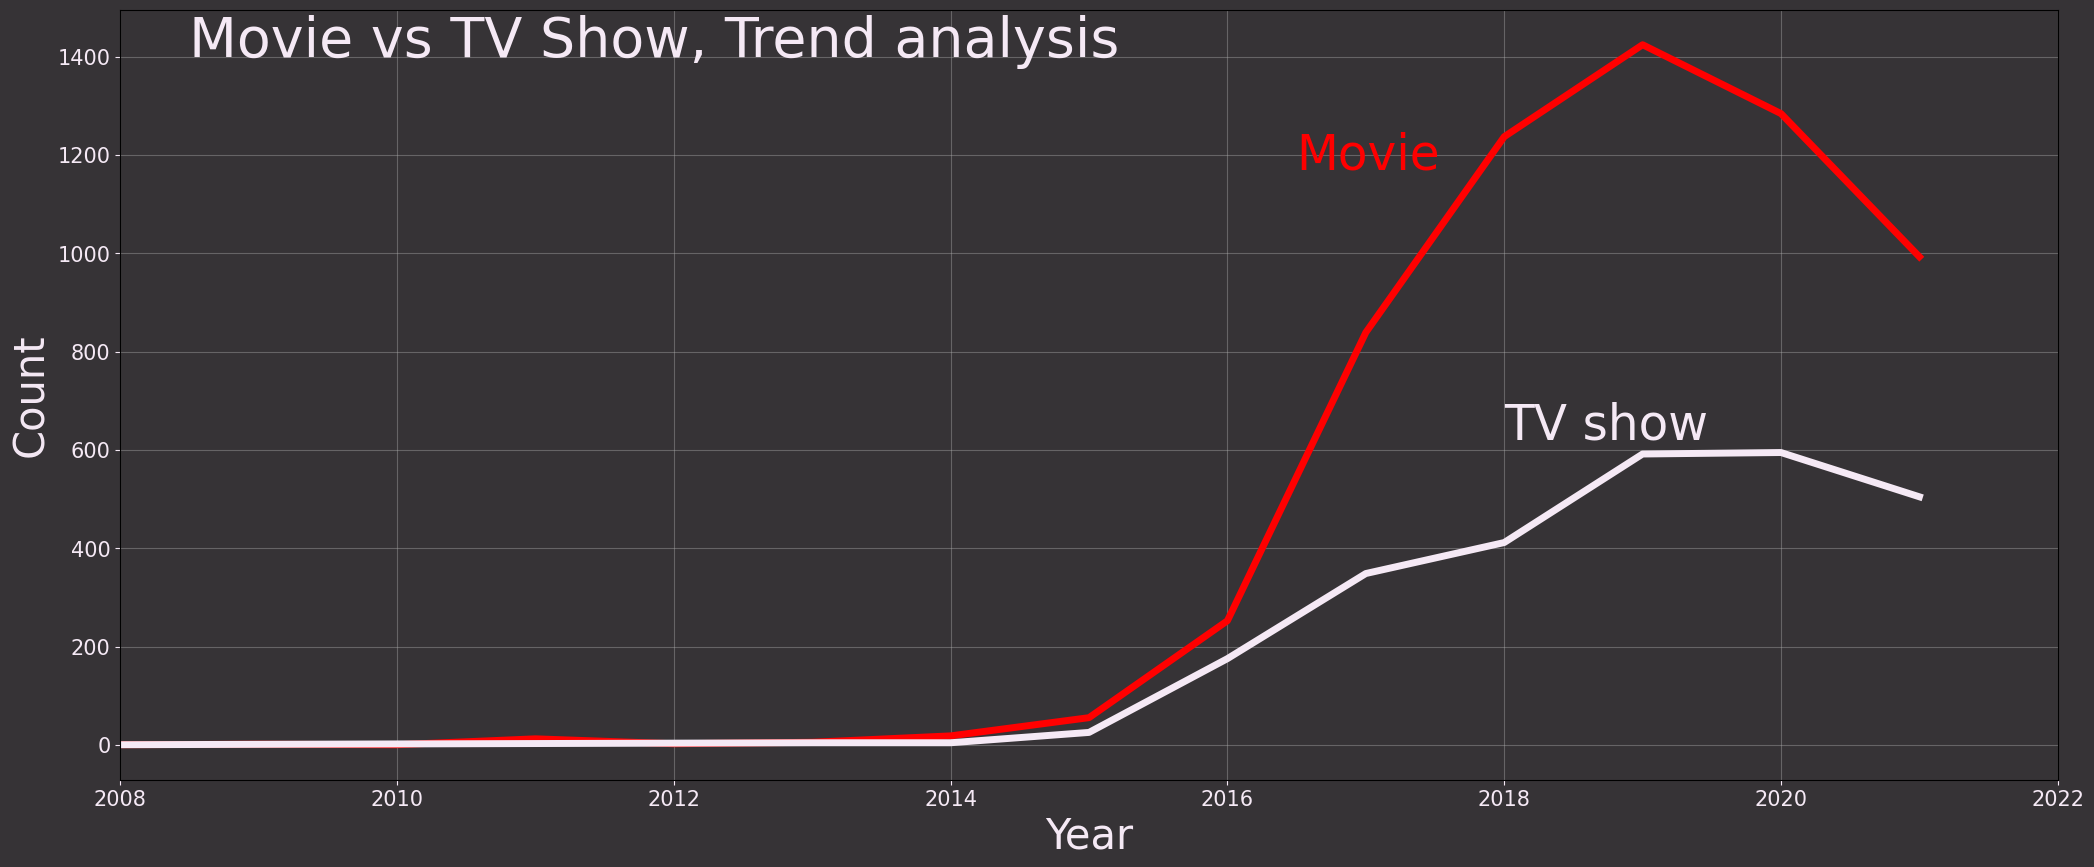

In [6]:
fig, ax = plt.subplots(figsize=(25, 10), facecolor="#363336")
ax.patch.set_facecolor('#363336')
ax.set_xticks(list(range(2008,2024,2)))
ax.tick_params(axis='x', colors='#F5E9F5',labelsize=15) 
ax.tick_params(axis='y', colors='#F5E9F5',labelsize=15)
ax.set_xlim(2008,2022)
sns.lineplot(x=movies_count.index, y=movies_count.values, color='red', ax=ax, linewidth=5)
sns.lineplot(x=tv_series_count.index, y=tv_series_count.values, color='#F5E9F5', ax=ax, linewidth=5)
ax.text(s="Movie vs TV Show, Trend analysis", x= 2008.5,y=1400,color='#F5E9F5',fontsize=40)
ax.text(s="Movie", x=2016.5, y= 1200,color='red', va="center",ha="left",fontsize=35)
ax.text(s="TV show", x=2018, y= 650,color='#F5E9F5', va="center",ha="left",fontsize=35)
ax.grid(True, alpha=0.4)
ax.set_xlabel('Year', fontsize=30, color='#F5E9F5')
ax.set_ylabel('Count', fontsize=30, color='#F5E9F5')
plt.show()

Netflix only started to add movies and tv shows to their platform in 2008. Both movies and tv shows have been growing steadily since then. However, the number of movies added to Netflix is much higher than the number of tv shows added. From 2019, the number of both movies and tv shows added to Netflix has been decreasing due to the pandemic.

**What month has the most content added to Netflix ?**

For this question, we will do on both movies and tv shows.

First, we need to create 2 dataframes, one for movies and one for tv shows and a dictionary to map the month number to the month name.

In [7]:
movies = movie_df[movie_df['type'] == 'Movie']['month_added']
tv_series = movie_df[movie_df['type'] == 'TV Show']['month_added']
month_name = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'July', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}

Next, we will visualize the number of movies/tv shows added each month using a bar chart.

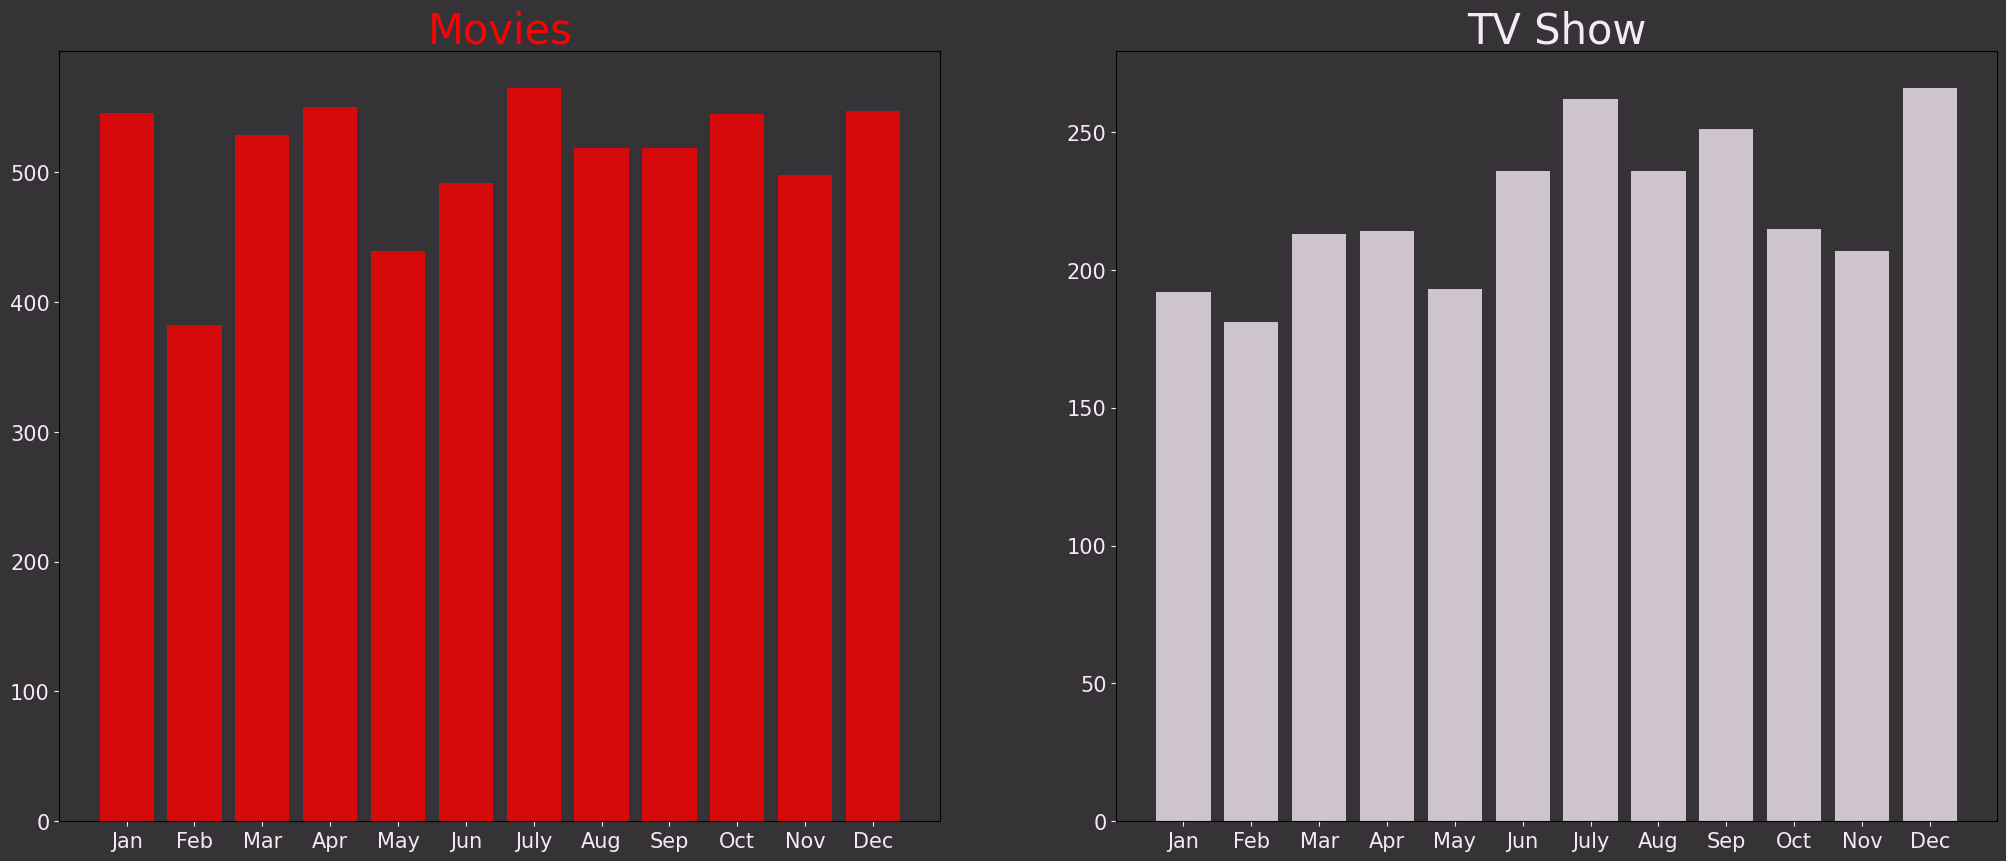

In [8]:
movies_count = movies.value_counts().sort_index()
tv_series_count = tv_series.value_counts().sort_index()
fig, ax = plt.subplots(figsize=(25, 10), facecolor="#363336", nrows = 1, ncols = 2)
ax[0].patch.set_facecolor('#363336')
ax[1].patch.set_facecolor('#363336')
ax[0].set_xticks(list(range(1,13)))
ax[1].set_xticks(list(range(1,13)))
ax[0].tick_params(axis='x', colors='#F5E9F5',labelsize=15)
ax[0].tick_params(axis='y', colors='#F5E9F5',labelsize=15)
ax[1].tick_params(axis='x', colors='#F5E9F5',labelsize=15)
ax[1].tick_params(axis='y', colors='#F5E9F5',labelsize=15)
ax[0].set_xticklabels(month_name.values())
ax[1].set_xticklabels(month_name.values())
ax[0].bar(movies_count.index, movies_count.values, color='red', alpha=0.8)
ax[1].bar(tv_series_count.index, tv_series_count.values, color='#F5E9F5', alpha=0.8)
ax[0].set_title('Movies', fontsize=30, color='red')
ax[1].set_title('TV Show', fontsize=30, color='#F5E9F5')
plt.show()

## Asking meaningful questions

### Question 1: How did Netflix react to the pandemic ?


Answering this question will help us understand Netflix's strategy during the pandemic. We will be looking at the main genre, the average duration, and the rating of the content added to Netflix in 2020 and 2021.

First, we need to filter out some useless genre such as "International Movies" and "International TV Shows" because they are not specific enough.

In [9]:
movie_df['listed_in'] = movie_df['listed_in'].apply(lambda x: ', '.join([i for i in x.split(', ') if i not in ['International Movies', 'International TV Shows']]))
movie_df['listed_in']

0                                Documentaries
1                      TV Dramas, TV Mysteries
2        Crime TV Shows, TV Action & Adventure
3                       Docuseries, Reality TV
4               Romantic TV Shows, TV Comedies
                         ...                  
8792            Cult Movies, Dramas, Thrillers
8793    Kids' TV, Korean TV Shows, TV Comedies
8794                   Comedies, Horror Movies
8795        Children & Family Movies, Comedies
8796                  Dramas, Music & Musicals
Name: listed_in, Length: 8797, dtype: object

Then, we filter out content that are only added to Netflix in 2020 and 2021 and save it to a new dataframe `pandemic_df`. For movies, we extract the minutes from the string, for tv shows, we extract the number of seasons from the string.

In [10]:
pandemic_df = movie_df[movie_df['year_added'].isin([2020, 2021])]
movies = pandemic_df[pandemic_df['type'] == 'Movie']
movies['duration'] = movies['duration'].apply(lambda x: int(x.split(' ')[0]))
tv_series = pandemic_df[pandemic_df['type'] == 'TV Show']
tv_series['duration'] = tv_series['duration'].apply(lambda x: int(x.split(' ')[0]))

Here, we define helper functions to help us analyze the data.

In [11]:
def genre_during_pandemic(df) -> pd.DataFrame:
    data = pd.DataFrame(index=[2020, 2021], columns=range(1,13))
    for i in range(2020, 2022):
        data_ = df[df['year_added'] == i]
        for j in range(1,13):
            try:
                data.loc[i,j] = data_[data_['month_added'] == j]['listed_in'].str.split(', ').explode().value_counts().index[0]
            except IndexError:
                data.loc[i,j] = None  
    return data

def ratings_during_pandemic(df) -> pd.DataFrame:
    data = pd.DataFrame(index=[2020, 2021], columns=range(1,13))
    for i in range(2020, 2022):
        data_ = df[df['year_added'] == i]
        for j in range(1,13):
            try:
                data.loc[i,j] = data_[data_['month_added'] == j]['rating'].value_counts().index[0]
            except IndexError:
                data.loc[i,j] = None  
    return data

def duration_during_pandemic_for_movie(df) -> pd.DataFrame:
    data = pd.DataFrame(index=[2020, 2021], columns=range(1,13))
    for i in range(2020, 2022):
        data_ = df[df['year_added'] == i]
        for j in range(1,13):
            try:
                data.loc[i,j] = round(data_[data_['month_added'] == j]['duration'].mean(), 2)
            except IndexError:
                data.loc[i,j] = None  
    return data

def duration_during_pandemic_for_tvshows(df) -> pd.DataFrame:
    data = pd.DataFrame(index=[2020, 2021], columns=range(1,13))
    for i in range(2020, 2022):
        data_ = df[df['year_added'] == i]
        for j in range(1,13):
            try:
                data.loc[i,j] = round(data_[data_['month_added'] == j]['duration'].mean(), 2)
            except IndexError:
                data.loc[i,j] = None  
    return data

In [12]:
movies_genre = genre_during_pandemic(movies)
movies_genre

,1,2,3,4,5,6,7,8,9,10,11,12
2020,Comedies,Dramas,Dramas,Dramas,Dramas,Dramas,Dramas,Dramas,Dramas,Dramas,Dramas,Dramas
2021,Dramas,Dramas,Dramas,Dramas,Dramas,Dramas,Dramas,Dramas,Dramas,None,None,None


In [13]:
movies_rating = ratings_during_pandemic(movies)
movies_rating

,1,2,3,4,5,6,7,8,9,10,11,12
2020,R,TV-MA,TV-MA,TV-14,TV-14,TV-MA,TV-MA,TV-MA,TV-MA,TV-MA,TV-MA,TV-MA
2021,R,TV-MA,TV-MA,TV-MA,TV-MA,TV-MA,TV-MA,TV-MA,PG-13,None,None,None


In [14]:
movies_duration = duration_during_pandemic_for_movie(movies)
movies_duration

,1,2,3,4,5,6,7,8,9,10,11,12
2020,104.24,101.56,94.84,108.89,107.77,103.64,106.12,93.67,103.25,97.75,98.83,93.0
2021,103.91,102.97,101.25,105.07,98.11,99.68,100.18,108.45,105.69,NaN,NaN,NaN


**Insights**:
- The duration of the movies during the pandemic is around 105 minutes
- Most of the genre is Drama
- Most of the content is rated TV-MA
- Therefore, we can see that Netflix's main target was adults during the pandemic. Due to the fact that during the pandemic, people were forced to stay at home or work from home, so they had more free time. Knowing that, Netflix has shifted its focus to adults.

In [15]:
tv_series_genre = genre_during_pandemic(tv_series)
tv_series_genre

,1,2,3,4,5,6,7,8,9,10,11,12
2020,TV Dramas,TV Dramas,TV Dramas,TV Comedies,TV Dramas,TV Dramas,Reality TV,Kids' TV,TV Dramas,TV Dramas,TV Dramas,TV Dramas
2021,Docuseries,TV Dramas,Kids' TV,TV Dramas,TV Dramas,TV Dramas,TV Dramas,TV Dramas,Kids' TV,None,None,None


In [16]:
tv_series_rating = ratings_during_pandemic(tv_series)
tv_series_rating

,1,2,3,4,5,6,7,8,9,10,11,12
2020,TV-MA,TV-MA,TV-MA,TV-MA,TV-MA,TV-MA,TV-MA,TV-MA,TV-MA,TV-MA,TV-MA,TV-MA
2021,TV-MA,TV-MA,TV-MA,TV-MA,TV-MA,TV-MA,TV-MA,TV-MA,TV-MA,None,None,None


In [17]:
tv_series_duration = duration_during_pandemic_for_tvshows(tv_series)
tv_series_duration

,1,2,3,4,5,6,7,8,9,10,11,12
2020,1.45,1.55,1.48,1.92,2.0,2.41,1.67,1.77,2.3,1.94,1.96,1.78
2021,2.0,1.86,1.7,1.55,1.71,1.81,2.51,1.8,2.2,NaN,NaN,NaN


**Insights**:
- Same as movies, Netflix's main target was adults during the pandemic when the genre is Drama and the most popular rating is TV-MA.

### Question 2: Who are the most diverse directors on Netflix, and what are their average TMDB scores ?

A diverse director here will be a director who has worked with many different genres and many different actors/ actresses. We will be looking at the number of genres and the number of actors/ actresses each director has worked with. Answering this question will help Netflix choose the right movies/ tv shows to add to their platform because these directors have worked with many different genres and many different actors/ actresses, so they have a lot of experience.



First, since a movie/ tv show can have multiple directors, actors/ actresses and genres. Therefore, we need to split those columns into multiple rows.

In [18]:
movie_df['director'] = movie_df['director'].str.split(',')
movie_df['cast'] = movie_df['cast'].str.split(',')
movie_df['listed_in'] = movie_df['listed_in'].str.split(',')

We create a new dataframe `temp_df` to store the needed columns. Here, they are director, cast. We then use that new dataframe to find the directors that have worked with the most actors/ actresses.

In [19]:
temp_df = movie_df[['director', 'cast']].explode('director').explode('cast')
director_actor_df = temp_df.groupby('director')['cast'].nunique().sort_values(ascending=False)

Same goes for the genres.

In [20]:
temp_df = movie_df[['director', 'listed_in']].explode('director').explode('listed_in') #A. L. Vijay
director_genre_df = temp_df.groupby('director')['listed_in'].nunique().sort_values(ascending=False)

Now, we need to find directors that appeared in both director_actor_df and director_genre_df. We then save the result to a new dataframe director_df. They are the most diverse directors on Netflix.

In [21]:
diverse_directors = list(set(director_actor_df[1:11].index) & set(director_genre_df[1:11].index))
diverse_directors

['Martin Scorsese', 'Clint Eastwood', 'Steven Spielberg']

Since our orginal dataset does not have the TMDB score, we need to use the TMDB API to get the score. After that, we can merge the `movie_df` with the `tmdb_rating` to get the TMDB.

In [22]:
tmdb_rating = pd.read_csv('../data/processed/tmdb.csv', index_col=0)
tmdb_rating.columns = ['title', 'tmdb_rating']
temp_df = movie_df[['title', 'director']]
temp_df = temp_df.merge(tmdb_rating, on='title')
temp_df = temp_df.explode('director')

Now, we want to find the average TMDB score for each director. 

In [23]:
average_IMDB_score = np.zeros(len(diverse_directors))
for idx, director in enumerate(diverse_directors):
    temp_df_ = temp_df[temp_df['director'] == director]
    average_IMDB_score[idx] = temp_df_['tmdb_rating'].mean()
directors_tmdb = pd.DataFrame({'director':diverse_directors, 'tmdb_rating':average_IMDB_score}).sort_values(by='tmdb_rating', ascending=False)
directors_tmdb

,director,tmdb_rating
0,Martin Scorsese,7.509167
1,Clint Eastwood,7.367857
2,Steven Spielberg,7.327545


Now, we want to know the stereotype of the most diverse directors on Netflix. We will be looking at what words appear the most in their work.

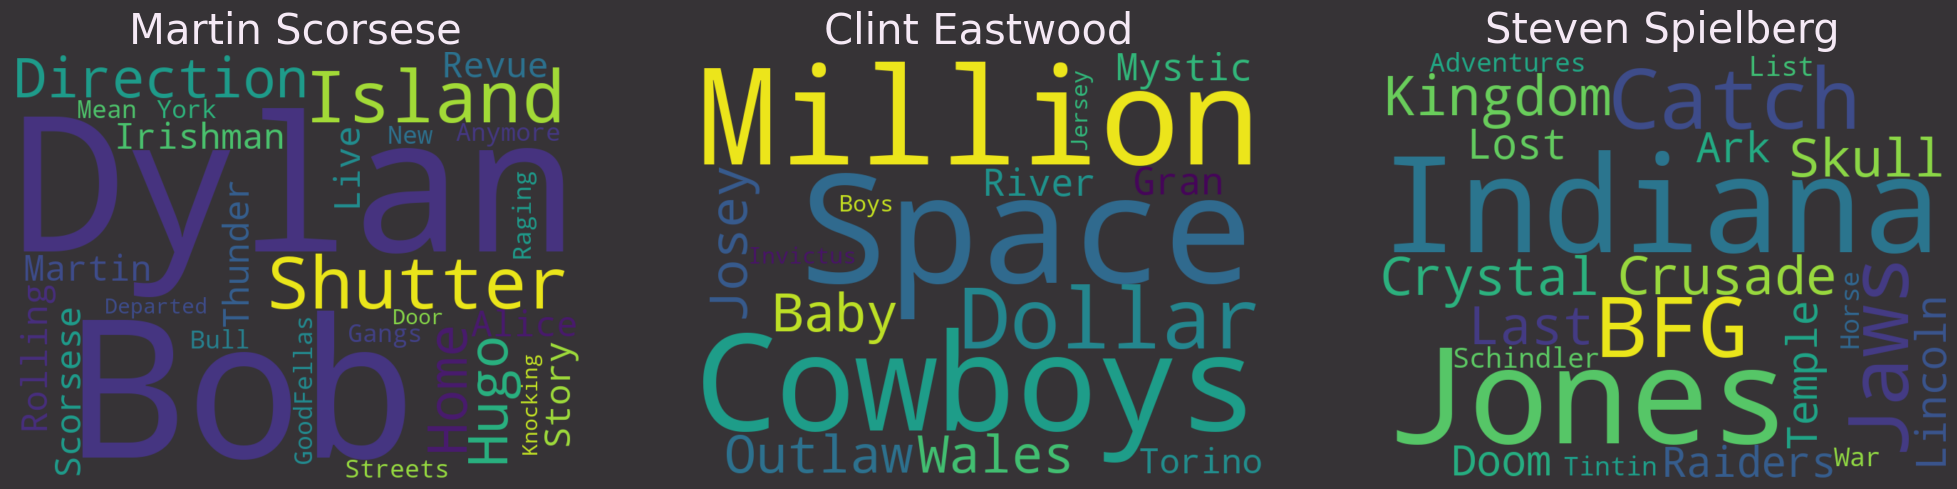

In [24]:
import wordcloud
fig, ax = plt.subplots(figsize=(25, 10), facecolor="#363336", nrows = 1, ncols = 3)

for idx, director in enumerate(diverse_directors):
    temp_df_ = temp_df[temp_df['director'] == director]
    wordcloud_ = wordcloud.WordCloud(background_color='#363336', width=800, height=600).generate(' '.join(temp_df_['title']))
    ax[idx].imshow(wordcloud_, interpolation='bilinear')
    ax[idx].set_title(director, fontsize=30, color='#F5E9F5')
    ax[idx].axis('off')
plt.show()

### Question 3: How is the pace of development in terms of the number of movies for the three countries with the largest number of movies?

**Answering this question will** help us understand Development Trends. By analyzing the number of movies in the three countries with the highest film production, we gain an overview of development trends in the film industry. This helps assess the growth and decline in film production in recent years.

#### Preprocessing: 
- Reason:
    - Multiple Countries in a Single Entry: Some movies may be produced or associated with multiple countries. This can create difficulties in analyzing the data by country if these countries are not separated.  
    - Simpler for Analysis: Separating country values into independent rows is more convenient for performing analyses, comparisons, or visualizations on a per-country basis.  
- Data Preprocessing Steps:
    - Copy the Original DataFrame: Create a copy of the original DataFrame to avoid modifying the initial data. 
    - Split Countries: Split values in the 'country' column, where each value is a list of countries, into separate lists.  
    - Explode the DataFrame: Use the explode function to break down lists of countries into independent rows. reset_index(drop=True) helps refresh the DataFrame's index.   
    - Result: The resulting DataFrame is df_country, where each row represents a movie and corresponds to a single country.

In [25]:
df_explode = movie_df.copy()
df_explode['country']=df_explode['country'].str.split(', ')
df_country=df_explode.explode('country').reset_index(drop=True)
df_country.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,year_added,month_added
0,Movie,Dick Johnson Is Dead,[Kirsten Johnson],[Unknown],United States,2021-09-25,2020,PG-13,90 min,[Documentaries],2021,9
1,TV Show,Blood & Water,[Unknown],"[Ama Qamata, Khosi Ngema, Gail Mabalane, Th...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"[TV Dramas, TV Mysteries]",2021,9
2,TV Show,Ganglands,[Julien Leclercq],"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, ...",Unknown,2021-09-24,2021,TV-MA,1 Season,"[Crime TV Shows, TV Action & Adventure]",2021,9
3,TV Show,Jailbirds New Orleans,[Unknown],[Unknown],Unknown,2021-09-24,2021,TV-MA,1 Season,"[Docuseries, Reality TV]",2021,9
4,TV Show,Kota Factory,[Unknown],"[Mayur More, Jitendra Kumar, Ranjan Raj, Al...",India,2021-09-24,2021,TV-MA,2 Seasons,"[Romantic TV Shows, TV Comedies]",2021,9


#### Analyze data to answer the question:
- Data Cleaning: filter out rows where the country is 'Unknown' and the type is 'Movie', focusing on movies with known countries.   
- Top 3 Countries: determine the top 3 countries with the most movies using value_counts() and iloc[:3].    
- Filter Data for Top 3 Countries: A new DataFrame, top_3_countries_data, is created by filtering for movies produced by the top 3 countries.   
- Grouping Data by Country and Release Year:use groupby to group the data by country and release year. size() calculates the number of movies for each group, and unstack() reshapes the data for better visualization. 
- Visualize: create a line chart to visualize the number of movies over time for the top 3 countries, providing insights into trends and patterns.

In [26]:
#Filtering out the unknown country from dataframe
df_cleaned = df_country[(df_country['country']!='Unknown') & (df_country['type']=='Movie') ]
top_3_countries = df_cleaned['country'].value_counts().iloc[:3]
top_3_countries

country
United States     2751
India              962
United Kingdom     532
Name: count, dtype: int64

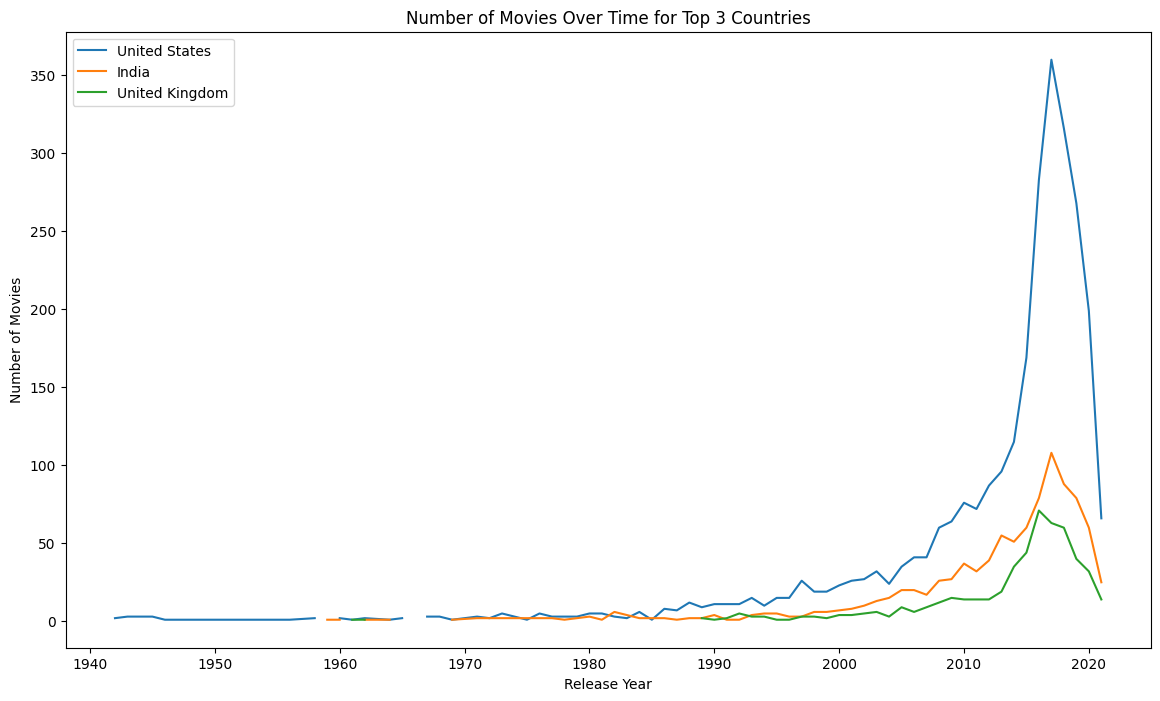

In [27]:
# Filter data for the top 3 countries
top_3_countries_data = df_cleaned[df_cleaned['country'].isin(top_3_countries.index)]

# Group by country and release year to get the count of movies for each year
grouped_data = top_3_countries_data.groupby(['country', 'release_year']).size().unstack()

# Visualize
plt.figure(figsize=(14, 8))
for country in top_3_countries.index:
    plt.plot(grouped_data.loc[country], label=country)

plt.title('Number of Movies Over Time for Top 3 Countries')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.legend()
plt.show()

### Question 4: What movie genres are commonly produced in the United States?

**Answering this question will** help us understand the U.S. film market, knowing which genres are commonly favored by U.S. filmmakers and audiences.

#### Preprocessing: 
- Reason:   
    - Multiple Countries in a Single Entry: Some movies may involve multiple countries, and having a single entry for each movie might make it challenging to analyze data on a per-country basis.  
    - Listed Genres: The 'listed_in' column likely contains a list of genres for each movie. Exploding this list will enable a more granular analysis of genres for movies from the United States.  
- Data Preprocessing Steps: 
    - Copy the DataFrame: Create a copy of the original DataFrame (df_explode) to avoid modifying the initial data.
    - Split Countries: Split values in the 'country' column, where each value is a list of countries, into separate lists.  
    - Explode DataFrame by Country: Use explode to break down lists of countries into independent rows, resetting the index for a clean DataFrame.  
    - Filter for United States Movies: Create a new DataFrame, df_United_States, by filtering for movies from the United States.    
    - Split Genres: Split values in the 'listed_in' column, where each value is a list of genres, into separate lists.  
    - Explode DataFrame by Genre: Use explode to break down lists of genres into independent rows, resetting the index for a clean DataFrame.   
    - Result: The resulting DataFrame, df_United_States, contains individual rows for each genre of movies from the United States.  

In [28]:
df_explode = movie_df.copy()
df_explode['country'] = df_explode['country'].str.split(', ')
df_country = df_explode.explode('country').reset_index(drop=True)

df_country = df_country[(df_country['country'] == 'United States') & (df_country['type']=='Movie')]
df_United_States = df_country
df_United_States = df_United_States.explode('listed_in').reset_index(drop=True)

df_United_States.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,year_added,month_added
0,Movie,Dick Johnson Is Dead,[Kirsten Johnson],[Unknown],United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,9
1,Movie,Sankofa,[Haile Gerima],"[Kofi Ghanaba, Oyafunmike Ogunlano, Alexandr...",United States,2021-09-24,1993,TV-MA,125 min,Dramas,2021,9
2,Movie,Sankofa,[Haile Gerima],"[Kofi Ghanaba, Oyafunmike Ogunlano, Alexandr...",United States,2021-09-24,1993,TV-MA,125 min,Independent Movies,2021,9
3,Movie,The Starling,[Theodore Melfi],"[Melissa McCarthy, Chris O'Dowd, Kevin Kline...",United States,2021-09-24,2021,PG-13,104 min,Comedies,2021,9
4,Movie,The Starling,[Theodore Melfi],"[Melissa McCarthy, Chris O'Dowd, Kevin Kline...",United States,2021-09-24,2021,PG-13,104 min,Dramas,2021,9


#### Analyze data to answer the question:
- Counting Movie Genres: use value_counts() to count the occurrences of each genre in the 'listed_in' column for movies from the United States.    
- Sort and get top 10: sort_values(ascending=False) sorts the genres in descending order based on counts, and iloc[:10] selects the top 10 genres.
- Visualize: create a bar chart to visualize the top 10 movie genres.

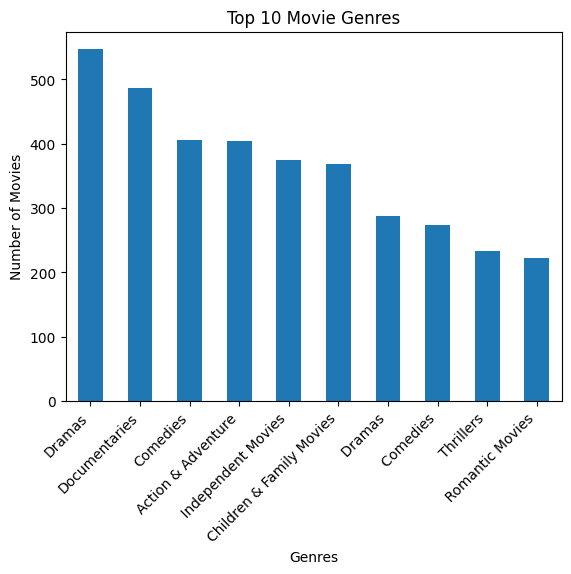

In [29]:
top_10_genres = df_United_States['listed_in'].value_counts().sort_values(ascending=False).iloc[:10]
top_10_genres

top_10_genres.plot(kind='bar')
plt.title('Top 10 Movie Genres')
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')  
plt.show()